In [52]:
import statistics

import pandas as pd

from helpers import *
from regression import *

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
ELO_DATE = '2025-11-10'
NUMBER_OF_SIMS = 10000
LEAGUE_ID = 107
SEASON = 2025
HEAD_SIZE = 24
COUNTRY_CODE_ELO = None
COUNTRY_CODE_API = 'POL'
STDEV = 10
UPDATE_FIXTURES = False
IS_EUROPEAN_LEAGUE = False

In [56]:
# download_elo_data(ELO_DATE)

In [57]:
# api_get_leagues()

In [58]:
# find_league_id('GB-ENG', 'Premier League')

# Brazil
# Brazil Serie A: 71

# England
# Premier League: 39
# Championship: 40
# League One: 41
# League Two: 42

# France
# Ligue 1: 61

# Germany
# Bundesliga: 78

# Italy
# Serie A: 135

# Poland
# Ekstraklasa: 106
# I Liga [Poland]: 107
# Polish Cup: 108
# II Liga - East [?] [Poland]: 109

# Romania
# Liga I: 283

# Scotland
# Premiership: 179

# Spain
# La Liga: 140

In [59]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [60]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

468 ELO teams matched.
2 unmatched ELO teams found, see transformed/elo/elo_unmatched.csv:
484 Opta teams matched.
596 unmatched Opta teams found, see transformed/opta/opta_unmatched_map.csv:
820 unmatched Opta teams found, see transformed/opta/opta_unmatched_elo_df.csv:
465 teams used for regression.
0.9417 R^2 score
y = 24.94 * x + -425.19


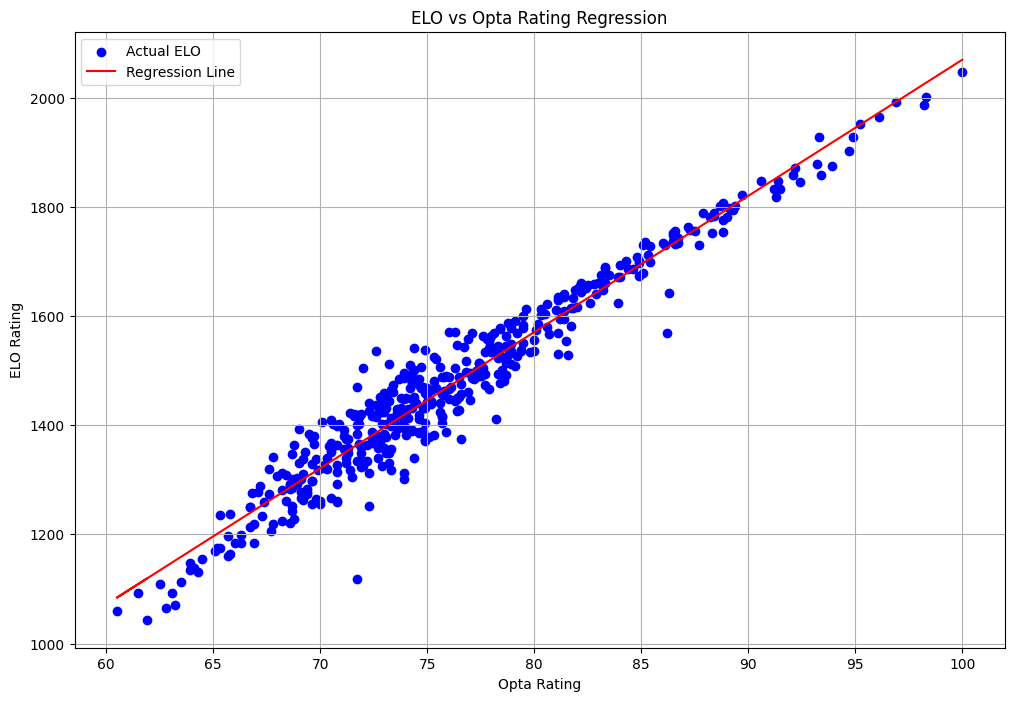

In [61]:
main_regression()

In [62]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, update_fixtures=UPDATE_FIXTURES)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Wisla Krakow,1360.81,38,16
2,Pogoń Grod. Mazowiecki,1148.78,31,16
3,Chrobry Głogów,1146.29,28,16
4,Polonia Bytom,1156.26,27,16
5,Slask Wroclaw,1241.07,27,16
6,Stal Rzeszów,1101.39,24,16
7,Ruch Chorzów,1166.24,24,16
8,Polonia Warszawa,1186.20,23,16
9,Wieczysta Kraków,1146.29,23,16
10,Odra Opole,1103.88,22,16


In [63]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Wisla Krakow,1360.81,38,16
2,Pogoń Grod. Mazowiecki,1148.78,31,16
3,Chrobry Głogów,1146.29,28,16
4,Polonia Bytom,1156.26,27,16
5,Slask Wroclaw,1241.07,27,16
6,Stal Rzeszów,1101.39,24,16
7,Ruch Chorzów,1166.24,24,16
8,Polonia Warszawa,1186.20,23,16
9,Wieczysta Kraków,1146.29,23,16
10,Odra Opole,1103.88,22,16


In [64]:
float(round(standings_df['Points'].sum() / standings_df['Games played'].sum(), 2))

1.36

In [65]:
sample_season = simulate_season_after_n_rounds(league_id=LEAGUE_ID, season=SEASON, standings_df=standings_df, is_european_league=IS_EUROPEAN_LEAGUE)
sample_season.head(HEAD_SIZE)

,Club,Points,Elo,Games played
0,Wisla Krakow,76,1360.81,34
1,Pogoń Grod. Mazowiecki,61,1148.78,34
6,Ruch Chorzów,57,1166.24,34
4,Slask Wroclaw,54,1241.07,34
10,ŁKS Łódź,53,1183.70,34
3,Polonia Bytom,52,1156.26,34
7,Polonia Warszawa,49,1186.20,34
8,Wieczysta Kraków,48,1146.29,34
5,Stal Rzeszów,47,1101.39,34
11,Miedz Legnica,45,1186.20,34


In [66]:
float(round(sample_season['Points'].sum() / sample_season['Games played'].sum(), 2))

1.37

In [67]:
# full table sim
results = run_full_table_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:54<00:00, 184.33it/s]

10000 simulations
1 winning places


,Club,Elo,xPts,Top 4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,Wisla Krakow,1360.81,74.70,100.0,98.3,1.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Slask Wroclaw,1241.07,56.11,67.9,0.8,32.6,20.4,14.0,9.7,6.7,5.1,3.9,2.8,1.5,1.1,0.7,0.5,0.1,0.0,0.0,0.0,0.0
3,Pogoń Grod. Mazowiecki,1148.78,54.71,57.9,0.4,23.6,19.1,14.6,11.3,9.1,6.3,4.8,3.5,2.9,1.8,1.2,0.8,0.2,0.1,0.0,0.0,0.0
4,Polonia Bytom,1156.26,51.85,37.4,0.2,11.4,12.8,13.0,11.4,10.9,9.2,7.6,6.9,5.2,3.8,3.4,2.2,1.3,0.6,0.1,0.1,0.0
5,Chrobry Głogów,1146.29,51.55,34.9,0.1,10.2,12.0,12.7,11.7,9.8,10.4,8.2,6.6,5.9,4.6,3.2,2.5,1.4,0.5,0.1,0.0,0.0
6,Polonia Warszawa,1186.20,49.79,24.2,0.0,5.8,8.3,10.1,10.7,10.6,9.7,9.1,8.2,7.5,6.7,4.7,4.3,2.5,1.3,0.4,0.1,0.0
7,Ruch Chorzów,1166.24,49.13,20.6,0.1,4.7,7.5,8.3,9.8,9.5,9.8,9.4,9.3,8.3,7.3,6.2,4.6,3.2,1.4,0.5,0.1,0.0
8,Miedz Legnica,1186.20,47.92,15.1,0.0,2.7,5.5,6.9,8.1,8.9,9.2,9.8,9.7,9.0,8.5,7.5,6.0,4.4,2.3,1.0,0.4,0.0
9,ŁKS Łódź,1183.70,47.19,12.2,0.0,2.2,4.3,5.7,7.4,8.1,8.8,9.2,10.1,9.7,9.0,8.0,7.0,5.6,3.1,1.2,0.4,0.1
10,Wieczysta Kraków,1146.29,46.84,11.4,0.0,2.3,3.9,5.2,6.4,7.5,8.1,9.0,9.8,10.1,9.6,9.0,8.2,5.8,3.2,1.3,0.4,0.1


In [68]:
# top 1
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:51<00:00, 192.67it/s]

10000 simulations
1 winning places


,Club,xPts,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,74.72,9816,9793,98.2,97.9,1.02,1.02
2,Slask Wroclaw,56.07,79,67,0.8,0.7,126.58,149.25
3,Pogoń Grod. Mazowiecki,54.67,53,40,0.5,0.4,188.68,250.00
4,Polonia Bytom,51.87,22,19,0.2,0.2,454.55,526.32
5,Chrobry Głogów,51.58,15,12,0.2,0.1,666.67,833.33
6,Ruch Chorzów,49.27,5,3,0.0,0.0,2000.00,3333.33
7,Polonia Warszawa,49.70,4,4,0.0,0.0,2500.00,2500.00
8,Wieczysta Kraków,46.97,3,3,0.0,0.0,3333.33,3333.33
9,ŁKS Łódź,47.09,2,2,0.0,0.0,5000.00,5000.00
10,Puszcza Niepołomice,43.59,1,1,0.0,0.0,10000.00,10000.00


In [69]:
# top 2
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=2, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:50<00:00, 198.41it/s]

10000 simulations
2 winning places


,Club,xPts,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,74.60,9977,9971,99.8,99.7,1.00,1.00
2,Slask Wroclaw,56.08,3388,3126,33.9,31.3,2.95,3.20
3,Pogoń Grod. Mazowiecki,54.65,2424,2211,24.2,22.1,4.13,4.52
4,Polonia Bytom,51.81,1076,947,10.8,9.5,9.29,10.56
5,Chrobry Głogów,51.65,1039,904,10.4,9.0,9.62,11.06
6,Polonia Warszawa,49.83,628,526,6.3,5.3,15.92,19.01
7,Ruch Chorzów,49.20,469,411,4.7,4.1,21.32,24.33
8,Miedz Legnica,47.93,313,266,3.1,2.7,31.95,37.59
9,ŁKS Łódź,47.11,203,175,2.0,1.8,49.26,57.14
10,Wieczysta Kraków,46.89,202,172,2.0,1.7,49.50,58.14


In [70]:
# top 3
# results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
# results.head(HEAD_SIZE)

In [71]:
# top 6
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=6, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:55<00:00, 178.71it/s]

10000 simulations
6 winning places


,Club,xPts,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Wisla Krakow,74.63,10000,10000,100.0,100.0,1.00,1.00
2,Slask Wroclaw,56.20,8452,8267,84.5,82.7,1.18,1.21
3,Pogoń Grod. Mazowiecki,54.75,7800,7539,78.0,75.4,1.28,1.33
4,Polonia Bytom,51.89,5995,5687,60.0,56.9,1.67,1.76
5,Chrobry Głogów,51.53,5691,5402,56.9,54.0,1.76,1.85
6,Polonia Warszawa,49.64,4374,4069,43.7,40.7,2.29,2.46
7,Ruch Chorzów,49.13,4043,3741,40.4,37.4,2.47,2.67
8,Miedz Legnica,47.94,3143,2860,31.4,28.6,3.18,3.50
9,ŁKS Łódź,47.16,2751,2480,27.5,24.8,3.64,4.03
10,Wieczysta Kraków,46.90,2567,2344,25.7,23.4,3.90,4.27


In [72]:
# bottom 3
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, reverse=True, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:52<00:00, 190.44it/s]

10000 simulations
3 winning places
Reverse: TRUE


,Club,xPts,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Znicz Pruszków,30.74,8135,7928,81.4,79.3,1.23,1.26
2,Górnik Łęczna,31.63,7700,7460,77.0,74.6,1.30,1.34
3,Tychy 71,34.26,5890,5583,58.9,55.8,1.70,1.79
4,Stal Mielec,34.96,5351,5031,53.5,50.3,1.87,1.99
5,Odra Opole,42.94,759,644,7.6,6.4,13.18,15.53
6,Puszcza Niepołomice,43.48,667,585,6.7,5.9,14.99,17.09
7,Pogoń Siedlce,44.36,487,420,4.9,4.2,20.53,23.81
8,Stal Rzeszów,45.34,328,284,3.3,2.8,30.49,35.21
9,Wieczysta Kraków,46.96,193,154,1.9,1.5,51.81,64.94
10,ŁKS Łódź,47.16,186,145,1.9,1.5,53.76,68.97


In [73]:
# NOT bottom 3
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=15, stdev=STDEV, standings_df=standings_df, update_fixtures=False)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [00:55<00:00, 180.63it/s]

10000 simulations
15 winning places


,Club,xPts,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Slask Wroclaw,56.07,10000,10000,100.0,100.0,1.00,1.00
2,Wisla Krakow,74.57,10000,10000,100.0,100.0,1.00,1.00
3,Pogoń Grod. Mazowiecki,54.70,9999,9999,100.0,100.0,1.00,1.00
4,Polonia Bytom,51.86,9981,9977,99.8,99.8,1.00,1.00
5,Chrobry Głogów,51.52,9977,9972,99.8,99.7,1.00,1.00
6,Ruch Chorzów,49.24,9936,9922,99.4,99.2,1.01,1.01
7,Polonia Warszawa,49.68,9934,9919,99.3,99.2,1.01,1.01
8,Miedz Legnica,47.86,9852,9824,98.5,98.2,1.02,1.02
9,ŁKS Łódź,47.27,9834,9788,98.3,97.9,1.02,1.02
10,Wieczysta Kraków,46.80,9811,9765,98.1,97.6,1.02,1.02
